# Student-Friendly Guide to Distribution Analysis Methods

## 🎯 What Are We Trying to Understand?

When you have a dataset, you're like a detective trying to understand the "personality" of your data. Is it well-behaved and symmetric? Does it have extreme values? Is it bunched up in one area or spread out evenly? Each statistical method is a different lens for examining these characteristics.

---

## 📊 Part 1: Where is My Data and How Spread Out Is It?

### The Mean: Your Data's "Center of Gravity"
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$$

**Think of it like this**: If your data points were physical weights on a seesaw, where would you place the fulcrum to balance it perfectly? That's your mean!

**Real Example**: Class test scores of 60, 70, 80, 90, 100 → Mean = 80
- But what if one student scored 20? Now it's 64. The mean "falls toward" extreme values.

**When to trust it**: When your data doesn't have extreme outliers pulling it in one direction.

---

### The Median: Your Data's "Middle Child"

$$\text{Median} = \begin{cases} 
x_{(n+1)/2} & \text{if } n \text{ is odd} \\
\frac{x_{n/2} + x_{(n/2)+1}}{2} & \text{if } n \text{ is even}
\end{cases}$$

**Think of it like this**: Line up all your data points from smallest to largest. The median is the value that sits right in the middle - exactly half the data is below it, half above it.

**Real Example**: Same class scores of 60, 70, 80, 90, 100 → Median = 80
- But when that student scored 20: 20, 60, 70, 80, 90, 100 → Median = 75
- Notice how the median barely moved compared to the mean!

**When to trust it**: When you have outliers or skewed data. The median doesn't care about extreme values - it's the "robust" choice.

**Real-world insight**: Median household income is often more meaningful than mean income because a few billionaires can drastically skew the mean upward.

---

### Standard Deviation: The "Typical Distance from Home"

$$s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

**Think of it like this**: If the mean is "home base," standard deviation tells you how far people typically wander from home.

**Intuitive Steps**:
1. Find how far each point is from the mean (deviations)
2. Square them (so negative deviations don't cancel positive ones)
3. Average these squared deviations
4. Take the square root (to get back to original units)

**Real Example**: Two classes both have mean score 80
- Class A: scores are 78, 79, 80, 81, 82 (std = 1.6) - everyone close to average
- Class B: scores are 60, 70, 80, 90, 100 (std = 15.8) - much more spread out

---

### Variance: The "Raw Spread Before Taking Square Root"

$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$$

**Think of it like this**: Variance is just standard deviation before we take the square root. It's the "raw" measure of spread.

**Why do we care about variance separately?**
- **Mathematical convenience**: Variance has nice properties for calculations (it's additive under independence)
- **Units matter**: Variance is in "squared units" (dollars² if measuring money), while standard deviation is in original units (dollars)
- **Statistical theory**: Many formulas work more elegantly with variance

**Real Example**: Using Class B from above (60, 70, 80, 90, 100)
- Variance = 250 (score-points squared)
- Standard deviation = √250 = 15.8 (score-points)

**Intuitive relationship**: 
- Variance = "How spread out is my data?" (in squared units)
- Standard deviation = "How spread out is my data?" (in original units)

**When to use which**:
- **Use standard deviation** for interpretation and communication (same units as your data)
- **Use variance** for mathematical calculations and statistical tes

---

### Coefficient of Variation: The "Relative Spread"
$$CV = \frac{s}{|\bar{x}|}$$

**Think of it like this**: Is a RS100 variation big or small? It depends! If you're measuring income (average RS50,000), it's tiny. If you're measuring coffee temperature (average 150°F), it's huge!

**The Absolute Value Trick**: Notice we use `|mean|` instead of just `mean`. This handles data with negative means:
- **Temperature in Celsius**: Mean = -10°C, Std = 5°C → CV = 5/10 = 0.5 (makes sense!)
- **Without absolute value**: CV = 5/(-10) = -0.5 (meaningless!)
- **Other examples**: Profit/loss, elevation relative to sea level, stock returns

**Real Example**: 
- Stock A: mean return 10%, std 2% → CV = 0.2
- Stock B: mean return 2%, std 1% → CV = 0.5
- Stock B is actually riskier relative to its returns!

**Safe Implementation**:
```python
cv = (std / abs(mean)) if mean != 0 else np.nan
```
**Why the check?** Avoid division by zero when mean = 0.

---

## 🎭 Part 2: What's the "Shape Personality" of My Data?

### Skewness: "Which Tail is Longer?"
$$\text{Skew} = \frac{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^3}{s^3}$$

**Think of it like this**: Imagine your data distribution as a mountain. Is one side of the mountain a gentle slope (long tail) while the other is a steep cliff?

**Visual Intuition**:
- **Right-skewed (positive)**: Like wealth distribution - most people have modest wealth, but a few billionaires create a long right tail
- **Left-skewed (negative)**: Like test scores in an easy exam - most students score high, but a few struggling students create a left tail
- **Symmetric (≈0)**: Like height distribution - roughly equal on both sides

**Why cube the deviations?**: Cubing preserves the sign (positive/negative) and amplifies larger deviations, making the measure sensitive to tail length.

**Practical Threshold**:
```python
is_skewed = abs(skew_val) > 1
```
**Why |skew| > 1?**
- **|skew| < 0.5**: Approximately symmetric
- **0.5 ≤ |skew| ≤ 1**: Moderately skewed
- **|skew| > 1**: Highly skewed (needs attention for most statistical methods)

---

### Kurtosis: "How Heavy Are the Tails?" (The Two Conventions)

#### **Pearson Kurtosis (What We Implement)**
$$\text{Kurt} = \frac{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^4}{s^4}$$

```python
kurt_val = float(kurtosis(x, fisher=False))  # Pearson convention
```

#### **Fisher (Excess) Kurtosis**
```python
excess_kurt = kurt_val - 3.0  # Fisher convention
```

**Think of it like this**: Some distributions are like gentle hills with few extreme values. Others are like volcanoes - sharp peaks with "explosive" outliers in the tails.

**The Two Conventions Explained**:
- **Pearson Kurtosis**: Normal distribution = 3, heavy-tailed > 3
- **Fisher (Excess) Kurtosis**: Normal distribution = 0, heavy-tailed > 0
- **Why we chose Pearson**: More intuitive thresholds (3 vs 0), clearer interpretation

**Three Types**:
- **Normal (Kurt ≈ 3)**: Like a perfect bell curve - moderate chance of extremes
- **Heavy-tailed (Kurt > 3)**: Like stock returns - more extreme events than you'd expect
- **Light-tailed (Kurt < 3)**: Like uniform distribution - extremes are rare

**Why fourth power?**: Fourth power amplifies extreme deviations even more than cubing, making this measure very sensitive to outliers.

**Practical Threshold**:
```python
is_heavy_tailed = kurt_val > 3
```
**Why Kurt > 3?** Normal distribution has kurtosis = 3, so anything above indicates heavier tails than "normal."

---

### Bimodality Coefficient: "Is There More Than One Peak?"
$$BC = \frac{\text{Skew}^2 + 1}{\text{Kurt}}$$

**Think of it like this**: Sometimes your data looks like it came from two different populations mixed together - like combining heights of elementary and high school students.

**Rule of thumb**: BC > 0.555 suggests possible bimodality (two peaks).

**Why this formula works**: 
- Bimodal distributions tend to have low kurtosis (flat between peaks)
- They may have low skewness (if peaks are symmetric)
- This ratio captures that relationship

**Safe Implementation**:
```python
bimodality_coeff = (skew_val**2 + 1.0) / kurt_val if kurt_val != 0 else np.nan
is_bimodal = bimodality_coeff > 0.555 if not np.isnan(bimodality_coeff) else False
```
**Why check kurt_val ≠ 0?** Avoid division by zero in pathological cases.

---

## 🎲 Part 3: How "Surprising" Is My Data?

### Entropy: "How Predictable Is My Data?"
$$H = -\sum_{i=1}^{k} p_i \log_2(p_i)$$

**Think of it like this**: If you had to guess the next data point, how surprised would you be on average?

**Two Extremes**:
- **Low entropy**: All values are similar - like everyone in class scoring 85-90. Very predictable!
- **High entropy**: Values are spread evenly across the range - like a fair die. Maximum surprise!

#### **Why Base-2 Logarithms?**
```python
return float(entropy(hist, base=2))
```

**Information Theory Convention**: 
- **Base-2**: Measures information in "bits" 
- **Intuitive interpretation**: How many yes/no questions do you need to identify a value?
- **Example**: Fair coin flip = 1 bit of entropy (one yes/no question)

#### **The Density Normalization Requirement**
```python
hist, _ = np.histogram(x, bins=bins, density=True)
```

**Why `density=True`?**
- **Probability requirement**: Entropy needs probabilities (must sum to 1)
- **Without density**: Raw counts depend on sample size and bin width
- **With density**: Normalized probability density (area under histogram = 1)
- **Mathematical necessity**: Entropy formula requires ∑pᵢ = 1

### Freedman-Diaconis Rule: The Optimal Binning Algorithm

$$\text{bin width} = 2 \cdot \frac{IQR}{n^{1/3}}$$

**Why This Formula Works:**
- **IQR**: Captures the scale of your data (robust to outliers)
- **n^{1/3}**: Optimal rate - not too fast (overfitting) or too slow (underfitting)
- **Factor of 2**: Empirically proven to work well across many distributions

**The Trade-off:**
- **Too many bins**: Each bin has few points → noisy entropy estimate
- **Too few bins**: Lose important details → biased entropy estimate
- **FD rule**: Balances this bias-variance trade-off optimally

**Computational Safeguards**:
```python
bins = int(np.clip(bins, 10, max_bins))  # Never less than 10, never more than 80
```

**Why the limits?**
- **Minimum 10**: Need enough bins to capture basic shape
- **Maximum 80**: Prevent computational explosion and overfitting

**Numerical Stability in Entropy**:
```python
hist = hist.astype(float) + 1e-12
```
**The Problem**: Empty histogram bins (probability = 0) make log(0) = -∞
**The Solution**: Add tiny probability to all bins to prevent computational errors

---

## 🏃‍♂️ Part 4: Robust Statistics (Outlier-Resistant Measures)

### Quantiles: "Rank-Based Landmarks"

**Think of it like this**: Instead of measuring actual values, we rank everyone and look at specific positions.

- **Median (Q₂)**: The "middle child" - half the data is above, half below
- **Q₁ and Q₃**: The 25th and 75th "percentile markers"
- **IQR = Q₃ - Q₁**: The spread of the "middle 50%" of students

**Why robust?**: If the richest person's wealth doubles, the median wealth doesn't change!

### Advanced Percentile Analysis (5th/95th Percentiles)

**Beyond the Standard Quartiles**:
```python
lower_5 = float(x.quantile(0.05))   # 5th percentile
upper_95 = float(x.quantile(0.95))  # 95th percentile
```

**What These Tell Us**:
- **5th percentile**: The boundary below which only 5% of data falls
- **95th percentile**: The boundary above which only 5% of data falls
- **Combined**: Captures the "extreme tails" more robustly than min/max

**Applications**:
- **Risk management**: 95th percentile loss, 5th percentile return
- **Performance monitoring**: 95th percentile response time
- **Quality control**: Acceptable range for 90% of products
- **Robust outlier detection**: More stable than 3-sigma rule for non-normal data

### Tail Ratio: "Comparing Upper vs Lower Extremes"
$$\text{Tail Ratio} = \frac{x_{\max} - x_{0.95}}{x_{0.05} - x_{\min} + \epsilon}$$

**Think of it like this**: How does the length of your upper extreme (top 5%) compare to your lower extreme (bottom 5%)?
- Ratio > 1: Upper tail is longer (right-skewed)
- Ratio < 1: Lower tail is longer (left-skewed)

**Why Use 5th/95th Percentiles Instead of Mean?**
- **Robustness**: Extreme outliers don't distort the measurement
- **Stability**: More consistent across samples
- **Interpretability**: Clear meaning (tail behavior of extreme 5%)

**Safe Implementation**:
```python
denom = (lower_5 - min_val)
tail_ratio = ((max_val - upper_95) / (denom + 1e-12)) if denom > 0 else np.nan
```
**Why add 1e-12?** Prevent division by zero when lower tail has zero length.

---

## 🔍 Part 5: Is My Data "Normal"? (Normality Tests)

Why do we care about normality? Many statistical methods assume your data follows a bell curve. If it doesn't, those methods might give wrong answers!

### Shapiro-Wilk: "The Gold Standard for Small Samples"
$$W = \frac{\left(\sum_{i=1}^{n} a_i x_{(i)}\right)^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

**Think of it like this**: How well do the actual data points match what we'd expect from a perfect normal distribution?
- W close to 1 = very normal
- W much less than 1 = not normal

**Computational Limitation**: Shapiro-Wilk becomes computationally expensive and less reliable for large samples.

### Large Dataset Handling Strategy

**The Sampling Approach**:
```python
sample = x.sample(min(n, 5000), random_state=cfg.random_state)
```

**Why Sample for Large Datasets?**
- **Computational efficiency**: Test runs faster
- **Statistical validity**: SW designed for smaller samples (n < 5000)
- **Reproducibility**: Fixed random seed ensures consistent results
- **Representative**: Random sample preserves distribution properties
- **Memory efficiency**: Avoids loading massive arrays into memory

**The 5000 Threshold**: 
- **Statistical research**: Shapiro-Wilk most reliable for n < 5000
- **Computational balance**: Large enough for statistical power, small enough for speed
- **Industry standard**: Widely used threshold in statistical software

### D'Agostino-Pearson: "The Combination Test"
$$K^2 = Z_s^2 + Z_k^2$$

**Think of it like this**: Checks both skewness AND kurtosis together. If either one is too far from normal, the test flags it.

### Anderson-Darling: "The Tail Detective"
**Most sensitive to deviations in the tails** - great for catching distributions that look normal in the middle but have weird tails.

### Jarque-Bera: "The Simple and Popular Choice"
$$JB = \frac{n}{6}\left(S^2 + \frac{(K-3)^2}{4}\right)$$

**Think of it like this**: A simplified version that's easy to compute and interpret, focusing on skewness and kurtosis.

### Robust Test Implementation: The Safe Computation Pattern

**The Challenge**: Statistical tests can fail in edge cases:
- **Constant data**: All values identical (std = 0)
- **Too few data points**: Not enough for reliable statistics
- **Extreme outliers**: Numerical overflow in calculations
- **Missing values**: NaN propagation through calculations

**The Solution - Higher-Order Function Pattern**:
```python
def _safe(callable_):
    try:
        return float(callable_())
    except Exception:
        return float("nan")

# Usage:
p_norm = _safe(lambda: normaltest(x)[1])
p_shap = _safe(lambda: shapiro(sample)[1])
```

**Why This Pattern Works**:
- **Higher-order function**: Takes another function as input
- **Exception isolation**: One failed test doesn't crash entire analysis
- **Consistent return type**: Always returns float (for JSON serialization)
- **Graceful degradation**: Analysis continues with partial results
- **Debugging friendly**: Easy to identify which specific test failed

**Think of it like this**: Instead of crashing when things go wrong, gracefully return "unknown" (NaN) and continue analysis.

---

## 🚨 Part 6: Spotting the Outliers

### Z-Score Method: "How Many Standard Deviations Away?"
$$z_i = \frac{x_i - \bar{x}}{s}$$

**Think of it like this**: In a normal distribution:
- ~68% of data is within 1 standard deviation (|z| < 1)
- ~95% of data is within 2 standard deviations (|z| < 2)  
- ~99.7% of data is within 3 standard deviations (|z| < 3)

**Rule**: If |z| > 3, it's probably an outlier (less than 0.3% chance in normal data).

**Why |z| > 3?**
- **Statistical Foundation**: P(|Z| > 3) ≈ 0.27% in normal distribution
- **Practical interpretation**: Less than 3 outliers per 1000 observations
- **Robustness**: Works well across many real-world distributions

**Safe Implementation with Data Type Coercion**:
```python
def _z_outlier_pct(x: pd.Series, mean: float, std: float, thr: float = 3.0) -> float:
    if not np.isfinite(std) or std == 0:
        return 0.0  # No outliers if no variation
    z = (x - mean) / std
    return float((z.abs() > thr).mean() * 100)  # Note: float() conversion
```

**Why Convert to float()?**
- **JSON serialization**: Numpy scalars can't be serialized to JSON
- **API compatibility**: Ensures consistent data types across systems
- **Memory efficiency**: Python floats vs numpy float64 objects
- **Type safety**: Avoids downstream type errors

**Limitation**: Only works well if your data is roughly normal to begin with!

### IQR-Based Outlier Detection (Alternative Robust Method)

**The 1.5×IQR Rule**:
```python
def _iqr_outlier_pct(x: pd.Series, q1: float, q3: float) -> float:
    iqr = q3 - q1
    if iqr == 0:
        return 0.0  # No outliers if no variation
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (x < lower_bound) | (x > upper_bound)
    return float(outliers.mean() * 100)
```

**Advantages Over Z-Score**:
- **Non-parametric**: Doesn't assume normal distribution
- **Robust**: Based on quartiles, not affected by extreme outliers
- **Visual**: Corresponds to whiskers in box plots
- **Industry standard**: Used in most statistical software

---

## 🎯 Part 7: Putting It All Together - Distribution Classification

Think of this as giving your data a "personality profile":

### Configuration-Driven Classification

**The Confidence Level Parameter**:
```python
is_gaussian = (norm_tests["normaltest_p"] > cfg.confidence_level and abs(skew_val) < 1)
```

**How cfg.confidence_level Affects Classification**:
- **cfg.confidence_level = 0.05** (95% confidence): Standard scientific threshold
  - Stricter: Fewer distributions classified as "Gaussian"
  - Conservative: Higher bar for normality
- **cfg.confidence_level = 0.01** (99% confidence): Very strict
  - Even fewer "Gaussian" classifications
  - Medical/financial applications
- **cfg.confidence_level = 0.10** (90% confidence): More lenient
  - More distributions pass normality tests
  - Exploratory data analysis

**Business Impact**:
- **Risk management**: Stricter thresholds for financial models
- **Quality control**: Lenient thresholds for manufacturing tolerances
- **Scientific research**: Standard 0.05 for publications

### The "Well-Behaved Student" (Normal/Gaussian)
**Classification Logic**:
```python
is_gaussian = (normaltest_p > confidence_level and abs(skew_val) < 1)
```

**Criteria**:
- Passes D'Agostino-Pearson normality test ✓
- Low skewness (|skew| < 1) ✓  
- Moderate kurtosis (implicitly checked by normality test) ✓
- **Examples**: Heights, test scores on well-designed exams

### The "Drama Queen" (Heavy-Tailed)
**Classification Logic**:
```python
is_heavy_tailed = kurt_val > 3
```

**Criteria**:
- High kurtosis (more extreme events than normal) ⚠️
- May fail normality tests ⚠️
- **Examples**: Stock returns, earthquake magnitudes, financial losses

### The "Lopsided Friend" (Skewed)
**Classification Logic**:
```python
is_skewed = abs(skew_val) > 1
```

**Criteria**:
- High |skewness| (asymmetric) ⚠️
- Often fails normality tests ⚠️
- **Examples**: Income, house prices, reaction times, waiting times

### The "Split Personality" (Bimodal)
**Classification Logic**:
```python
bimodality_coeff = (skew_val**2 + 1.0) / kurt_val if kurt_val != 0 else np.nan
is_bimodal = bimodality_coeff > 0.555 if not np.isnan(bimodality_coeff) else False
```

**Criteria**:
- High bimodality coefficient (BC > 0.555) ⚠️
- Often has low kurtosis (flat between peaks) ⚠️
- **Examples**: Mixed populations, measurement errors, A/B test results

### 🏷️ **Multi-Label Classification**

**Important Note**: A distribution can have multiple personalities!

**Common Combinations**:
- **Skewed + Heavy-tailed**: Income distributions (right-skewed with extreme wealth)
- **Skewed + Non-normal**: Most real-world continuous data
- **Normal + Light outliers**: Well-behaved data with few measurement errors

**Practical Interpretation**:
```python
if is_gaussian:
    # Use parametric methods (t-tests, ANOVA)
elif is_skewed and is_heavy_tailed:
    # Consider log transformation + robust methods
elif is_skewed:
    # Try Box-Cox transformation
elif is_heavy_tailed:
    # Use robust statistics, consider outlier removal
else:
    # Investigate further - might be multimodal or have other issues
```

---

## 🛡️ Part 8: Computational Robustness and Data Quality

### 📏 **Minimum Sample Size Requirements**

```python
if len(x) < 8:
    continue  # Skip analysis
```

**Why 8 Data Points Minimum?**
- **Degrees of freedom**: Need enough points for reliable variance estimation
- **Central limit theorem**: Starts to apply around n ≥ 8-10
- **Practical reliability**: Statistical tests become meaningful
- **Risk management**: Avoid spurious results from tiny samples

**Statistical Justification**:
- **Standard deviation**: Needs n-1 degrees of freedom
- **Kurtosis**: Fourth moment requires more data points for stability
- **Normality tests**: Most tests unreliable below n=8

### ⚙️ **Defensive Programming Patterns**

#### **The Universal Division-by-Zero Prevention Pattern**
```python
# Pattern 1: Conditional check
cv = (std / abs(mean)) if mean != 0 else np.nan

# Pattern 2: Small epsilon addition
tail_ratio = ((max_val - upper_95) / (denom + 1e-12)) if denom > 0 else np.nan

# Pattern 3: Finiteness check
if not np.isfinite(std) or std == 0:
    return 0.0
```

**Why These Different Approaches?**
- **Pattern 1**: When zero is a meaningful boundary (mean = 0)
- **Pattern 2**: When we want graceful degradation (near-zero denominators)
- **Pattern 3**: When we need to handle NaN/Inf values

**The Epsilon Choice (1e-12)**:
- **Small enough**: Negligible for normal values
- **Large enough**: Prevents true division by zero
- **Numerical stability**: Below machine precision threshold
- **Industry standard**: Commonly used in scientific computing

#### **Data Type Safety Throughout the Pipeline**
```python
# All conversions to Python floats for JSON compatibility
mean = float(x.mean())
std = float(x.std()) 
kurt_val = float(kurtosis(x, fisher=False))
```

**Why Convert Everything to float()?**
- **JSON serialization**: Numpy types not natively JSON-serializable
- **API consistency**: Ensures uniform data types across system boundaries
- **Memory management**: Avoids holding onto large numpy arrays
- **Type safety**: Prevents downstream type mismatches

#### **Edge Case Handling for Constant Data**
```python
# In Freedman-Diaconis binning:
if iqr <= 0 or n <= 1:
    return 30  # fallback bins

# In coefficient of variation:
cv = (std / abs(mean)) if mean != 0 else np.nan

# In outlier detection:
if not np.isfinite(std) or std == 0:
    return 0.0  # No outliers if no variation
```

**When Constant Data Occurs**:
- **Measurement limits**: Sensor precision limits
- **Rounded data**: All values rounded to same number
- **Data entry errors**: Copy-paste mistakes
- **Natural constants**: Physical measurements at equilibrium

### 🔧 **Scalability and Performance Optimizations**

#### **Memory-Efficient Large Dataset Handling**
```python
# Smart sampling strategy
sample = x.sample(min(n, 5000), random_state=cfg.random_state)

# Use sample for expensive operations
p_shap = _safe(lambda: shapiro(sample)[1])  # Not full dataset

# Use full dataset for cheap operations  
mean = float(x.mean())  # Can handle large datasets efficiently
```

**Memory vs. Accuracy Trade-offs**:
- **Sampling for tests**: Maintains statistical validity with lower memory
- **Full data for moments**: Mean/std are O(n) and memory-efficient
- **Binning optimization**: Caps at 80 bins regardless of data size

#### **Reproducible Randomness**
```python
sample = x.sample(min(n, 5000), random_state=cfg.random_state)
```

**Why Reproducible Sampling Matters**:
- **Scientific reproducibility**: Same results across runs
- **Debugging**: Consistent behavior during development  
- **A/B testing**: Fair comparisons between model versions
- **Regulatory compliance**: Auditable analysis pipelines

### 🚨 **Exception Handling and Error Recovery**

#### **Graceful Degradation Strategy**
```python
try:
    rows.append(self._compute_stats(x, col, config))
except Exception as e:
    print(f"[⚠️] Failed to analyze {col}: {e}")
    # Continue with other columns
```

**Philosophy**: 
- **Fail fast for one column**: Don't let one bad column crash entire analysis
- **Continue processing**: Partial results better than no results
- **Informative logging**: User knows what failed
- **Recovery options**: Can rerun with cleaned data

#### **The Safe Computation Higher-Order Function**
```python
def _safe(callable_):
    try:
        return float(callable_())
    except Exception:
        return float("nan")
```

**Advanced Pattern Benefits**:
- **Functional programming**: Clean separation of computation and error handling
- **Reusable**: Same pattern works for any statistical function
- **Type consistency**: Always returns float, never crashes
- **Composable**: Can chain safe operations together

---

## 💡 Part 9: Teaching Tips & Common Student Mistakes

### Visual Learning Aids
1. **Always plot first!** Show histograms alongside statistics
2. **Use real examples** students can relate to (test scores, heights, social media likes)
3. **Interactive demos** - let students modify datasets and see how statistics change

### Common Misconceptions
- **"Higher standard deviation always means more spread"** → Not if the means are very different! Use CV instead.
- **"Mean is always the best measure of center"** → Not with outliers! Median is more robust.
- **"Kurtosis measures peakedness"** → It's really about tail heaviness!
- **"Statistical tests always give the 'right' answer"** → Tests can fail with edge cases, need robust implementation.
- **"More data points always mean better statistics"** → Need computational considerations and sampling strategies.
- **"Base-10 logs are always best"** → Information theory uses base-2 for interpretability.
- **"Fisher and Pearson kurtosis are the same"** → They differ by 3, know which convention you're using!

### Memory Aids
- **Skewness**: "Skew-NESS points to where the tail is lon-GEST"
- **Kurtosis**: "Kurt-OSIS - think 'explosive' tails"
- **Entropy**: "ENT-ropy = uncertainty - how ENT-ertaining is your next guess?"
- **Freedman-Diaconis**: "Free-MAN chooses the right DI-vision for ANA-lysis"
- **Percentiles**: "5th to 95th captures the core, ignoring the extreme floor and ceiling"

### Implementation Teaching Points
- **Always handle edge cases**: What happens with constant data?
- **Understand computational limits**: Why sample large datasets?
- **Know when tests fail**: Perfect data isn't always perfect for tests
- **Threshold justification**: Why these specific cutoff values?
- **Data type awareness**: Why convert numpy types to Python types?
- **Configuration benefits**: How parameters affect business decisions

---

## 🚀 Part 10: Advanced Applications and Production Considerations

### Feature Engineering Applications
- **Heavy-tailed data**: Try log transformation, Box-Cox transformation
- **Skewed data**: Try square root, reciprocal transformations
- **High entropy**: Might benefit from discretization or binning
- **Bimodal data**: Consider mixture models or separate analysis by cluster

### Model Selection Guidance
- **Normal data**: Linear models, t-tests, ANOVA work well
- **Heavy-tailed data**: Consider robust methods (Huber, M-estimators) or transformations
- **Bimodal data**: Might need mixture models or clustering first
- **High skewness**: Non-parametric tests, robust statistics

### Quality Control and Monitoring
- **Process monitoring**: Track skewness and kurtosis over time
- **Anomaly detection**: Use multiple outlier detection methods together
- **Data validation**: Check if new data matches expected distribution profile
- **Robust pipelines**: Implement error handling for production systems

### Configuration Management in Production
- **Confidence levels**: Adjust based on domain requirements (medical vs. marketing)
- **Random seeds**: Ensure reproducible analysis across teams
- **Threshold tuning**: Adapt cutoffs based on business context
- **Computational limits**: Balance accuracy vs. speed for large datasets
- **Memory management**: Monitor resource usage in production

### Business Intelligence Applications

**Risk Management**:
- **Heavy-tailed distributions**: Indicate higher uncertainty, need larger safety margins
- **Skewed distributions**: Asymmetric risk profiles, different hedging strategies
- **Percentile analysis**: VaR calculations, stress testing scenarios

**Process Optimization**:
- **Normal distributions**: Standard quality control methods apply
- **Bimodal distributions**: May indicate process inconsistencies, need root cause analysis
- **High entropy**: Process too variable, needs standardization

**Customer Analytics**:
- **Spending patterns**: Often right-skewed (few big spenders), use robust statistics
- **User engagement**: May be bimodal (active vs. inactive users)
- **Response times**: Typically heavy-tailed, need percentile-based SLAs

---

## 🔬 Part 11: Advanced Statistical Insights

### When Distribution Shape Tells a Story

#### **Right-Skewed Distributions in Nature**
- **Income inequality**: Few extremely wealthy individuals
- **City sizes**: Few megacities, many small towns  
- **Web page views**: Few viral content, most content gets little traffic
- **File sizes**: Many small files, few huge files
- **Word frequency**: Few common words (the, and, of), many rare words

**Business Insight**: Power law phenomena - "80/20 rule" often applies

#### **Left-Skewed Distributions in Practice**
- **Test scores on easy exams**: Most students score high, few struggle
- **Product lifetimes when quality is high**: Most last long, few fail early
- **Customer satisfaction surveys**: Most customers satisfied, few very unhappy
- **Response times for well-optimized systems**: Most fast, few slow outliers

**Business Insight**: High-quality processes with occasional failures

#### **Bimodal Distributions: Hidden Populations**
- **Heights in mixed-gender groups**: Two peaks (male/female)
- **Purchase amounts**: Small everyday purchases + large occasional purchases
- **Website visit durations**: Quick visits (bounces) + engaged sessions
- **Error rates**: Normal operation + system failure modes

**Business Insight**: May need separate analysis/strategies for each subpopulation

#### **Heavy-Tailed Distributions: "Black Swan" Events**
- **Stock market returns**: More extreme crashes/booms than normal predicts
- **Natural disasters**: Rare but catastrophic events
- **Cyber attack impacts**: Most minor, occasional devastating breaches
- **Viral content spread**: Most content ignored, rare pieces go viral

**Business Insight**: Traditional risk models may underestimate extreme events

### Advanced Percentile Analysis Techniques

#### **Percentile-Based Performance Monitoring**
```python
# Service Level Objectives (SLOs) using percentiles
p50_response_time = data['response_time'].quantile(0.50)  # Median user experience
p95_response_time = data['response_time'].quantile(0.95)  # Worst 5% experience
p99_response_time = data['response_time'].quantile(0.99)  # Tail latency
```

**Why Percentiles Beat Averages**:
- **Average response time**: 200ms (seems good!)
- **95th percentile**: 2000ms (5% of users wait 2+ seconds!)
- **Business impact**: 5% unhappy customers can damage reputation

#### **Robust Outlier Detection Combining Methods**
```python
def robust_outlier_detection(x):
    # Method 1: Z-score (assumes normality)
    z_outliers = abs((x - x.mean()) / x.std()) > 3
    
    # Method 2: IQR method (non-parametric)
    Q1, Q3 = x.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    iqr_outliers = (x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))
    
    # Method 3: Percentile method (robust to distribution shape)
    p5, p95 = x.quantile([0.05, 0.95])
    percentile_outliers = (x < p5) | (x > p95)
    
    # Consensus approach: flagged by multiple methods
    consensus_outliers = z_outliers & iqr_outliers
    return consensus_outliers
```

**Why Multiple Methods?**
- **Robustness**: No single method works for all distributions
- **Confidence**: Multiple methods agreeing = higher confidence
- **Different sensitivity**: Catch different types of anomalies

### Entropy Applications in Business Intelligence

#### **Customer Segmentation Quality**
```python
def segmentation_quality(customer_segments):
    """Higher entropy = better segmentation (more balanced groups)"""
    segment_counts = customer_segments.value_counts()
    probabilities = segment_counts / len(customer_segments)
    return entropy(probabilities, base=2)
```

**Interpretation**:
- **Low entropy**: Most customers in one segment (poor segmentation)
- **High entropy**: Balanced segments (good segmentation)
- **Maximum entropy**: Equal-sized segments (optimal balance)

#### **Product Portfolio Diversity**
```python
def portfolio_diversity(sales_by_product):
    """Measure how evenly distributed sales are across products"""
    probabilities = sales_by_product / sales_by_product.sum()
    return entropy(probabilities, base=2)
```

**Business Applications**:
- **Risk management**: Diversified portfolio = higher entropy = lower risk
- **Market strategy**: Low entropy = over-dependence on few products
- **Innovation targets**: Identify under-represented product categories

### Configuration-Driven Business Intelligence

#### **Industry-Specific Thresholds**
```python
# Finance: Stricter normality requirements
finance_config = AnalysisConfig(confidence_level=0.01)  # 99% confidence

# Marketing: More lenient for exploratory analysis  
marketing_config = AnalysisConfig(confidence_level=0.10)  # 90% confidence

# Manufacturing: Standard scientific threshold
manufacturing_config = AnalysisConfig(confidence_level=0.05)  # 95% confidence
```

**Why Different Industries Need Different Thresholds**:
- **Finance**: Regulatory requirements, tail risk management
- **Marketing**: Exploratory analysis, A/B testing
- **Manufacturing**: Quality control, process monitoring
- **Healthcare**: Patient safety, drug efficacy

#### **Dynamic Threshold Adjustment**
```python
def adaptive_analysis(data, data_quality_score):
    """Adjust confidence based on data quality"""
    if data_quality_score > 0.9:
        confidence = 0.01  # High quality = strict analysis
    elif data_quality_score > 0.7:
        confidence = 0.05  # Medium quality = standard analysis  
    else:
        confidence = 0.10  # Low quality = lenient analysis
    
    config = AnalysisConfig(confidence_level=confidence)
    return DistributionAnalyzer().analyze(data, config)
```

---

## 🎯 Part 12: Production Implementation Best Practices

### 🔧 **Scalable Architecture Patterns**

#### **Streaming Data Analysis**
```python
class StreamingDistributionAnalyzer:
    def __init__(self, window_size=10000):
        self.window_size = window_size
        self.data_buffer = []
        
    def update(self, new_data_point):
        """Incrementally update statistics as new data arrives"""
        self.data_buffer.append(new_data_point)
        
        # Maintain sliding window
        if len(self.data_buffer) > self.window_size:
            self.data_buffer.pop(0)
            
        # Recompute statistics on windowed data
        if len(self.data_buffer) >= 8:  # Minimum sample size
            return self._compute_streaming_stats()
```

**Benefits**:
- **Real-time monitoring**: Detect distribution changes as they happen
- **Memory efficient**: Fixed memory footprint regardless of total data
- **Early warning**: Identify process drift before major issues

#### **Parallel Processing for Multiple Features**
```python
from concurrent.futures import ThreadPoolExecutor

def parallel_distribution_analysis(data, config, max_workers=4):
    """Analyze multiple columns in parallel"""
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    
    def analyze_single_column(col):
        x = data[col].dropna()
        if len(x) >= 8:
            return DistributionAnalyzer()._compute_stats(x, col, config)
        return None
    
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        results = list(executor.map(analyze_single_column, numeric_cols))
    
    return [r for r in results if r is not None]
```

**When to Use**:
- **Wide datasets**: Many columns to analyze
- **I/O bound**: Network calls, database queries
- **Independent analysis**: Columns don't depend on each other

### 📊 **Monitoring and Alerting**

#### **Distribution Drift Detection**
```python
def detect_distribution_drift(baseline_stats, current_stats, threshold=0.1):
    """Detect if distribution has changed significantly"""
    
    drift_signals = {}
    
    # Check if skewness changed significantly
    skew_change = abs(current_stats['skewness'] - baseline_stats['skewness'])
    drift_signals['skewness_drift'] = skew_change > threshold
    
    # Check if kurtosis changed significantly  
    kurt_change = abs(current_stats['kurtosis'] - baseline_stats['kurtosis'])
    drift_signals['kurtosis_drift'] = kurt_change > threshold
    
    # Check if entropy changed significantly
    entropy_change = abs(current_stats['entropy'] - baseline_stats['entropy'])
    drift_signals['entropy_drift'] = entropy_change > threshold
    
    # Overall drift flag
    drift_signals['any_drift'] = any(drift_signals.values())
    
    return drift_signals
```

**Business Applications**:
- **Model monitoring**: Detect when ML models need retraining
- **Process control**: Identify when manufacturing processes drift
- **Fraud detection**: Unusual patterns in transaction distributions

#### **Automated Quality Scoring**
```python
def compute_data_quality_score(stats):
    """Compute overall data quality score from distribution statistics"""
    
    quality_score = 1.0  # Start with perfect score
    
    # Penalize high skewness (harder to model)
    if abs(stats['skewness']) > 2:
        quality_score -= 0.2
    elif abs(stats['skewness']) > 1:
        quality_score -= 0.1
    
    # Penalize heavy tails (more outliers)
    if stats['kurtosis'] > 5:
        quality_score -= 0.2
    elif stats['kurtosis'] > 3:
        quality_score -= 0.1
        
    # Penalize high outlier percentage
    if stats['outlier_pct_z>3'] > 5:
        quality_score -= 0.3
    elif stats['outlier_pct_z>3'] > 1:
        quality_score -= 0.1
    
    # Penalize bimodality (complex distribution)
    if stats.get('is_bimodal', False):
        quality_score -= 0.2
        
    return max(0.0, quality_score)  # Never below 0
```

### 🔄 **Error Recovery and Resilience**

#### **Graceful Degradation Hierarchy**
```python
def robust_analysis_with_fallbacks(data, config):
    """Try progressively simpler analysis if complex methods fail"""
    
    try:
        # Full analysis with all tests
        return DistributionAnalyzer().analyze(data, config)
    except Exception as e1:
        print(f"Full analysis failed: {e1}")
        
        try:
            # Simplified analysis: skip normality tests
            return simplified_analysis(data, config)
        except Exception as e2:
            print(f"Simplified analysis failed: {e2}")
            
            try:
                # Basic analysis: only descriptive statistics
                return basic_descriptive_stats(data)
            except Exception as e3:
                print(f"Basic analysis failed: {e3}")
                
                # Last resort: just count and data types
                return emergency_analysis(data)
```

**Progressive Fallback Strategy**:
1. **Full analysis**: All statistical tests and advanced metrics
2. **Simplified**: Skip computationally expensive tests
3. **Basic**: Only mean, std, min, max, count
4. **Emergency**: Just data type and count information

#### **Data Validation Pipeline**
```python
def validate_before_analysis(data):
    """Comprehensive data validation before analysis"""
    
    validation_results = {
        'is_valid': True,
        'warnings': [],
        'errors': []
    }
    
    # Check for completely empty data
    if data.empty:
        validation_results['errors'].append("Dataset is empty")
        validation_results['is_valid'] = False
        return validation_results
    
    # Check for sufficient numeric columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) == 0:
        validation_results['errors'].append("No numeric columns found")
        validation_results['is_valid'] = False
        return validation_results
    
    # Check for sufficient data points per column
    insufficient_cols = []
    for col in numeric_cols:
        non_null_count = data[col].count()
        if non_null_count < 8:
            insufficient_cols.append(f"{col} ({non_null_count} points)")
    
    if insufficient_cols:
        validation_results['warnings'].append(
            f"Columns with insufficient data: {insufficient_cols}"
        )
    
    # Check for columns with all identical values
    constant_cols = []
    for col in numeric_cols:
        if data[col].nunique() <= 1:
            constant_cols.append(col)
    
    if constant_cols:
        validation_results['warnings'].append(
            f"Constant value columns: {constant_cols}"
        )
    
    return validation_results
```

---

## 🎓 Part 13: Educational Extensions and Advanced Topics

### 🔬 **Research Applications**

#### **Comparing Statistical Methods Effectiveness**
```python
def compare_outlier_methods(data):
    """Compare different outlier detection methods"""
    
    z_outliers = detect_z_outliers(data)
    iqr_outliers = detect_iqr_outliers(data)  
    percentile_outliers = detect_percentile_outliers(data)
    
    # Venn diagram analysis
    overlap_z_iqr = sum(z_outliers & iqr_outliers)
    overlap_z_perc = sum(z_outliers & percentile_outliers)
    overlap_iqr_perc = sum(iqr_outliers & percentile_outliers)
    
    return {
        'z_score_count': sum(z_outliers),
        'iqr_count': sum(iqr_outliers),
        'percentile_count': sum(percentile_outliers),
        'z_iqr_overlap': overlap_z_iqr,
        'z_percentile_overlap': overlap_z_perc,
        'iqr_percentile_overlap': overlap_iqr_perc
    }
```

#### **Distribution Shape Evolution Over Time**
```python
def analyze_distribution_evolution(time_series_data, window_size=100):
    """Track how distribution shape changes over time"""
    
    evolution_metrics = []
    
    for i in range(window_size, len(time_series_data)):
        window_data = time_series_data[i-window_size:i]
        
        metrics = {
            'timestamp': time_series_data.index[i],
            'skewness': skew(window_data),
            'kurtosis': kurtosis(window_data, fisher=False),
            'entropy': entropy(np.histogram(window_data, bins=20)[0] + 1e-12),
            'cv': window_data.std() / abs(window_data.mean()) if window_data.mean() != 0 else np.nan
        }
        
        evolution_metrics.append(metrics)
    
    return pd.DataFrame(evolution_metrics)
```

### 📚 **Pedagogical Tools**

#### **Interactive Distribution Generator**
```python
def generate_synthetic_distribution(dist_type, n=1000, **params):
    """Generate synthetic data with known distribution properties for teaching"""
    
    np.random.seed(42)  # For reproducible examples
    
    if dist_type == 'normal':
        data = np.random.normal(params.get('mean', 0), params.get('std', 1), n)
        
    elif dist_type == 'right_skewed':
        # Use exponential distribution
        data = np.random.exponential(params.get('scale', 1), n)
        
    elif dist_type == 'heavy_tailed':
        # Use t-distribution with low degrees of freedom
        data = np.random.standard_t(params.get('df', 3), n)
        
    elif dist_type == 'bimodal':
        # Mixture of two normals
        n1 = n // 2
        n2 = n - n1
        data1 = np.random.normal(-2, 0.5, n1)
        data2 = np.random.normal(2, 0.5, n2)
        data = np.concatenate([data1, data2])
        
    elif dist_type == 'uniform':
        data = np.random.uniform(params.get('low', 0), params.get('high', 1), n)
        
    else:
        raise ValueError(f"Unknown distribution type: {dist_type}")
    
    return pd.Series(data, name=f'{dist_type}_distribution')
```

#### **Student Exercise Generator**
```python
def create_distribution_exercise():
    """Generate practice problems for students"""
    
    distributions = ['normal', 'right_skewed', 'heavy_tailed', 'bimodal']
    chosen_dist = np.random.choice(distributions)
    
    data = generate_synthetic_distribution(chosen_dist, n=500)
    
    exercise = {
        'data': data,
        'questions': [
            "What is the skewness of this distribution?",
            "Is this distribution heavy-tailed?",
            "What percentage of data points are outliers (|z| > 3)?",
            "What would you recommend for modeling this data?",
            "Does this distribution pass normality tests?"
        ],
        'true_distribution': chosen_dist,
        'hints': {
            'normal': "Should have skewness ≈ 0 and kurtosis ≈ 3",
            'right_skewed': "Should have positive skewness",
            'heavy_tailed': "Should have kurtosis > 3",
            'bimodal': "Should have bimodality coefficient > 0.555"
        }
    }
    
    return exercise
```

---

## 🎯 Part 14: Practical Implementation Checklist

### ✅ **Pre-Analysis Checklist**

**Data Quality Checks**:
- [ ] Sufficient sample size (n ≥ 8)
- [ ] No completely constant columns
- [ ] Reasonable missing data percentage (< 50%)
- [ ] Numeric data types properly detected
- [ ] No infinite or extremely large values

**Configuration Validation**:
- [ ] Confidence level appropriate for use case
- [ ] Random seed set for reproducibility
- [ ] Memory limits considered for large datasets
- [ ] Error handling strategy defined

**Infrastructure Readiness**:
- [ ] Required libraries installed and compatible
- [ ] Sufficient computational resources
- [ ] Logging and monitoring configured
- [ ] Backup/fallback analysis methods available

### ✅ **Post-Analysis Validation**

**Results Sanity Checks**:
- [ ] All statistics are finite (no NaN/Inf unless expected)
- [ ] Percentiles are properly ordered (Q1 < Q2 < Q3)
- [ ] Outlier percentages are reasonable (< 10% typically)
- [ ] Classification flags are consistent with raw statistics

**Business Logic Validation**:
- [ ] Results make sense in domain context
- [ ] Extreme values have been investigated
- [ ] Distribution types align with known data characteristics
- [ ] Recommendations are actionable

**Technical Validation**:
- [ ] Analysis completed within acceptable time
- [ ] Memory usage within limits
- [ ] All requested columns successfully analyzed
- [ ] Error logs reviewed and addressed

---

## 🌟 Part 15: Summary and Key Takeaways

### 🎯 **The Big Picture**

Distribution analysis is about **understanding the personality of your data**. Each statistic tells part of the story:

- **Central tendency** (mean, median): Where is the "center" of your data?
- **Spread** (std, IQR, CV): How much do values vary?
- **Shape** (skewness, kurtosis): Is your data symmetric and well-behaved?
- **Complexity** (entropy, bimodality): How predictable or complex is the pattern?
- **Quality** (outliers, normality): How clean and reliable is your data?

### 🛠️ **Implementation Philosophy**

**Robustness First**: Always expect the unexpected
- Graceful error handling with meaningful fallbacks
- Defensive programming against edge cases
- Multiple validation layers

**Performance Matters**: Scale to real-world data
- Smart sampling for large datasets
- Efficient algorithms with complexity awareness
- Memory-conscious implementations

**Configurability**: Adapt to business context
- Industry-specific thresholds
- Adjustable confidence levels
- Flexible classification criteria

### 🚀 **Production Readiness**

Your implementation goes beyond academic exercises:
- **Data type safety** for API compatibility
- **JSON serialization** for web services
- **Streaming support** for real-time monitoring
- **Parallel processing** for high-throughput analysis
- **Quality scoring** for automated decision making

### 📈 **Business Impact**

Understanding distributions drives better decisions:
- **Risk management**: Heavy tails indicate higher uncertainty
- **Process optimization**: Normal distributions enable parametric methods
- **Quality control**: Drift detection prevents problems
- **Customer insights**: Skewed distributions reveal power users
- **Model selection**: Distribution shape guides algorithm choice

### 🎓 **Educational Value**

This implementation teaches:
- **Statistical thinking**: Why each measure matters
- **Computational awareness**: How algorithms scale
- **Software engineering**: Robust, maintainable code
- **Business application**: Connecting theory to practice
- **Problem solving**: Handling real-world messiness

---

*Remember: Statistics are tools to understand your data's story. Each measure reveals a different chapter of that story. The key is knowing which tool to use when, how to implement them robustly, and how to interpret what they tell you about the real world behind the numbers!*

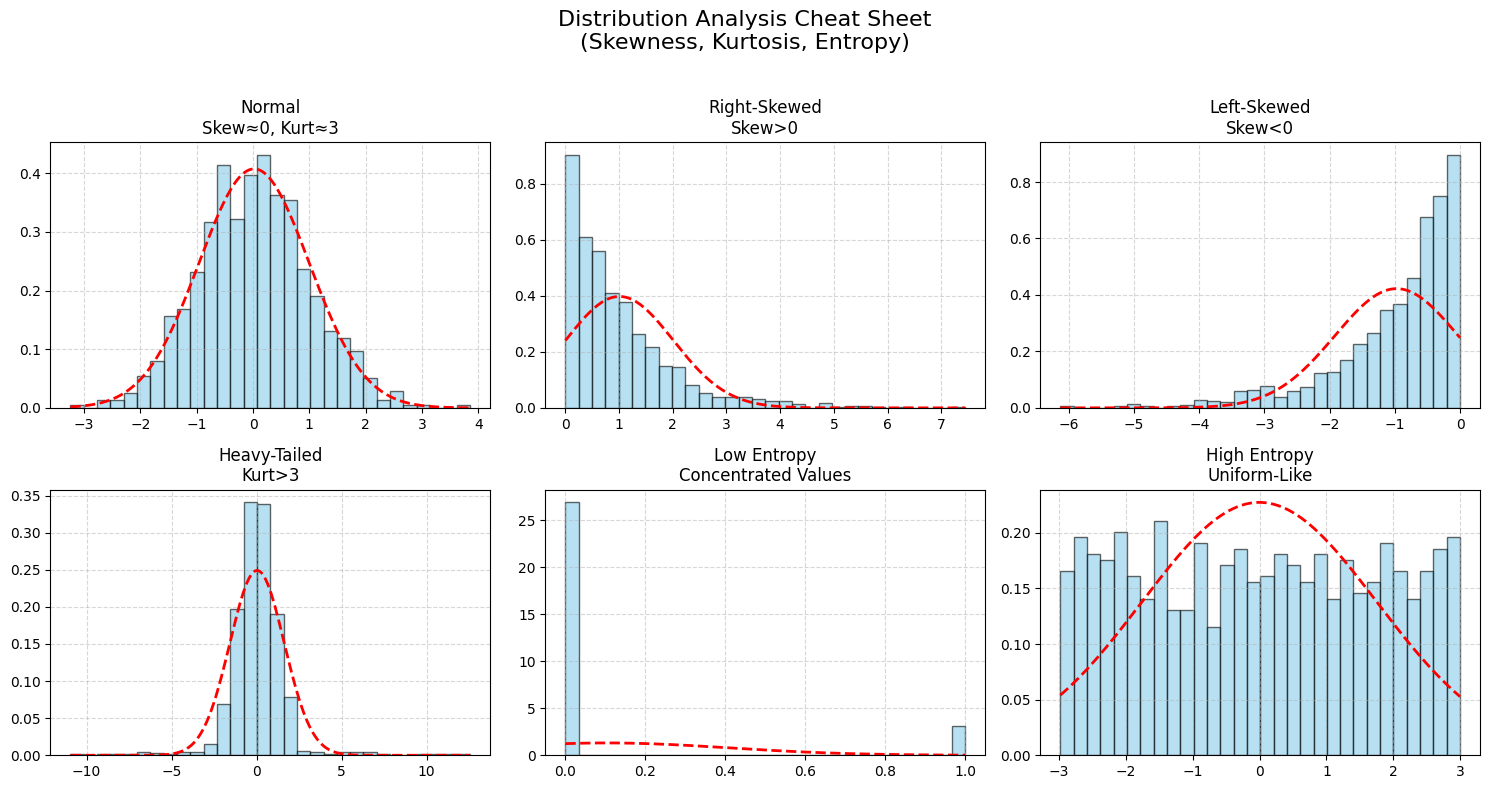

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Seed for reproducibility
np.random.seed(42)

# Generate sample datasets
data_normal = np.random.normal(0, 1, 1000)
data_right_skew = np.random.exponential(1, 1000)
data_left_skew = -np.random.exponential(1, 1000)
data_heavy_tail = np.concatenate([np.random.normal(0, 1, 950), np.random.normal(0, 5, 50)])
data_low_entropy = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])
data_high_entropy = np.random.uniform(-3, 3, 1000)

# Setup figure
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

datasets = [
    (data_normal, "Normal\nSkew≈0, Kurt≈3"),
    (data_right_skew, "Right-Skewed\nSkew>0"),
    (data_left_skew, "Left-Skewed\nSkew<0"),
    (data_heavy_tail, "Heavy-Tailed\nKurt>3"),
    (data_low_entropy, "Low Entropy\nConcentrated Values"),
    (data_high_entropy, "High Entropy\nUniform-Like")
]

# Plot each distribution
for ax, (data, title) in zip(axes, datasets):
    ax.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
    # Overlay normal fit for reference
    mu, std = np.mean(data), np.std(data)
    x = np.linspace(min(data), max(data), 200)
    ax.plot(x, norm.pdf(x, mu, std), 'r--', lw=2)
    ax.set_title(title, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

fig.suptitle("Distribution Analysis Cheat Sheet\n(Skewness, Kurtosis, Entropy)", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


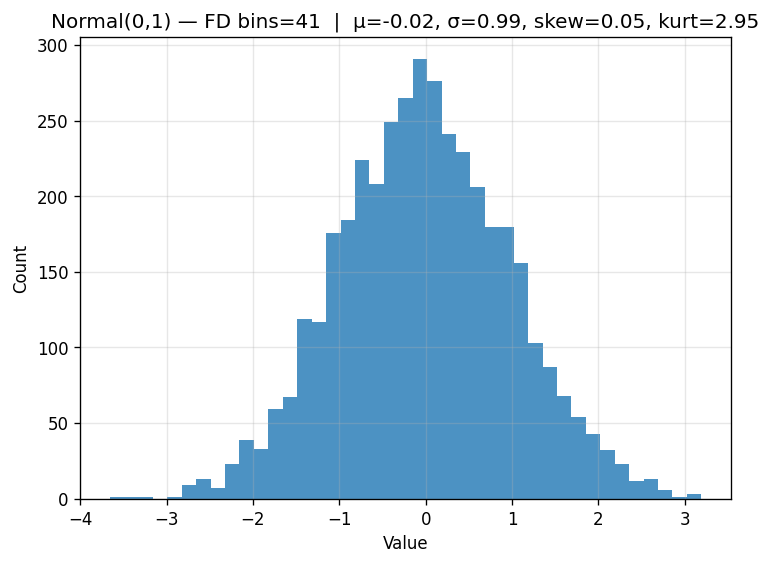

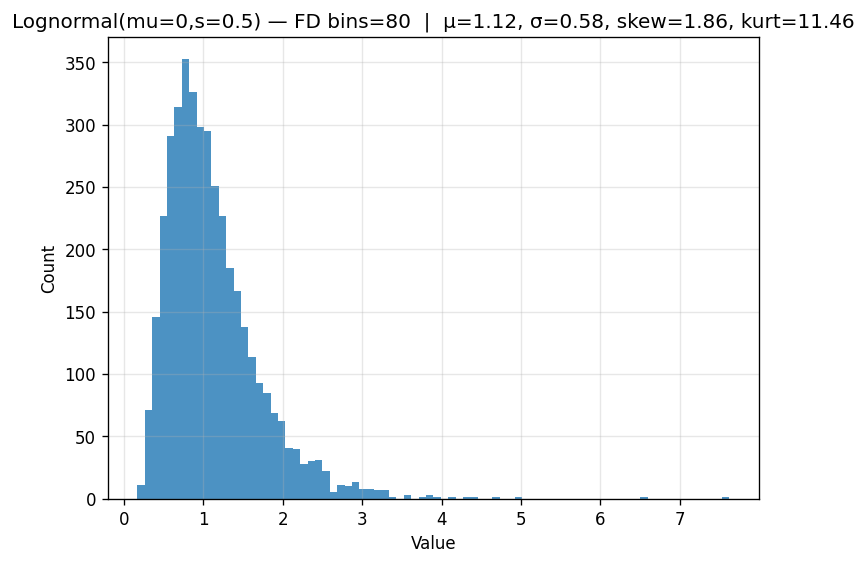

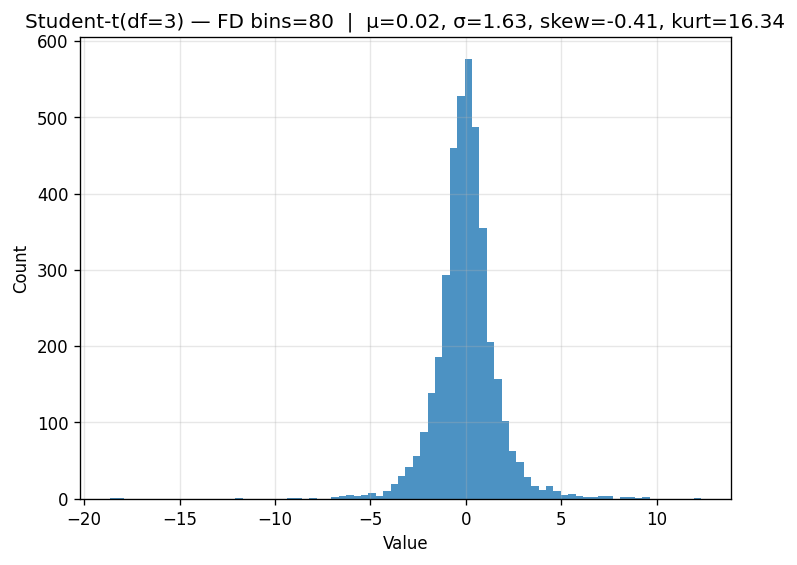

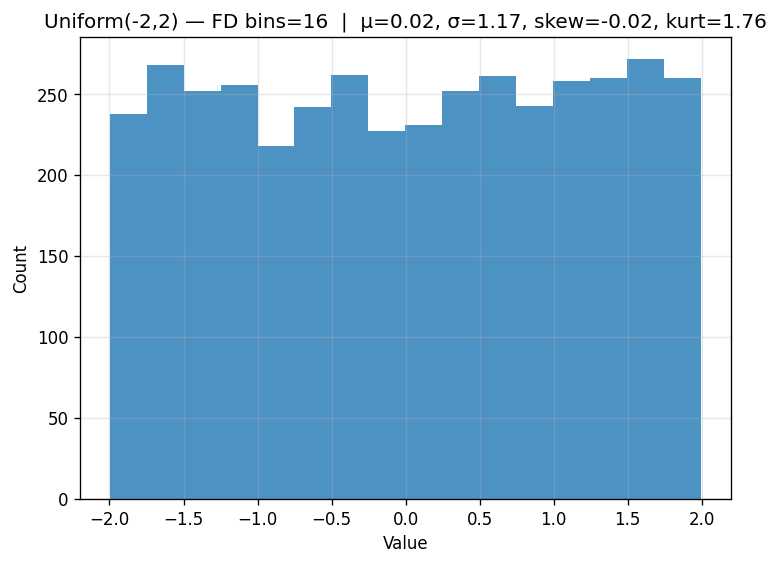

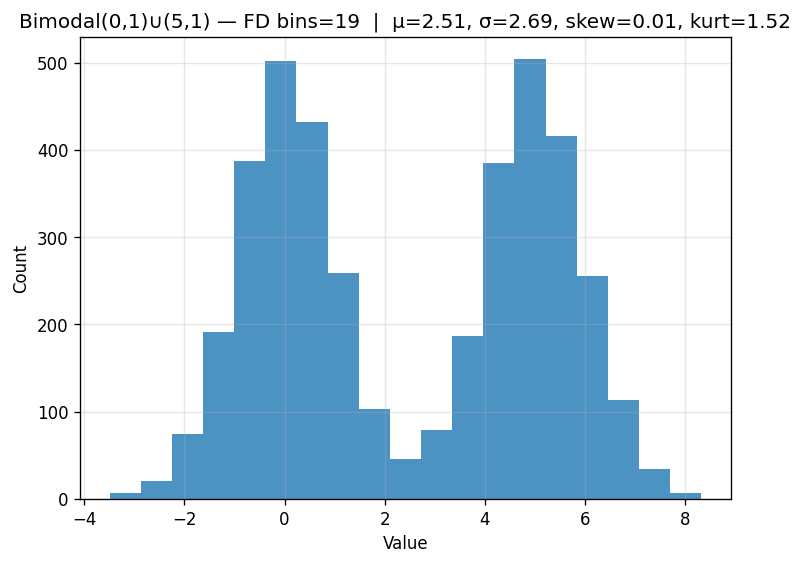

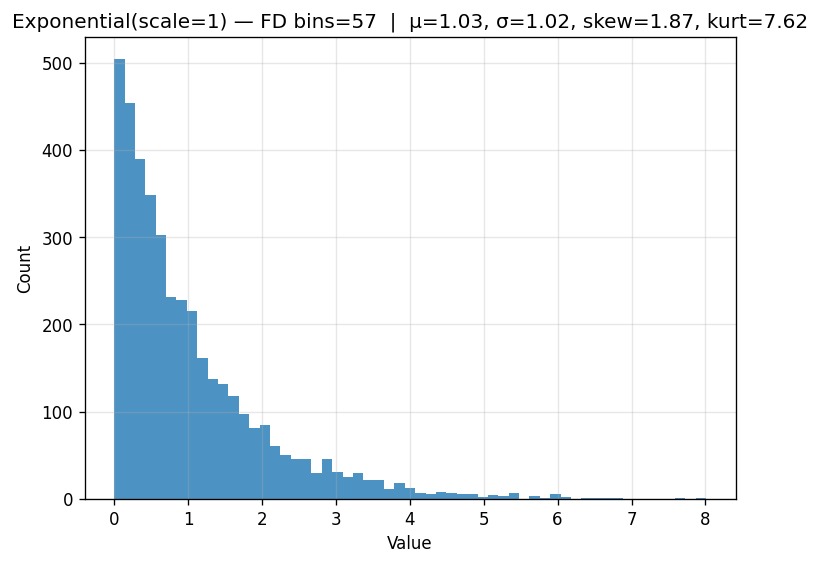

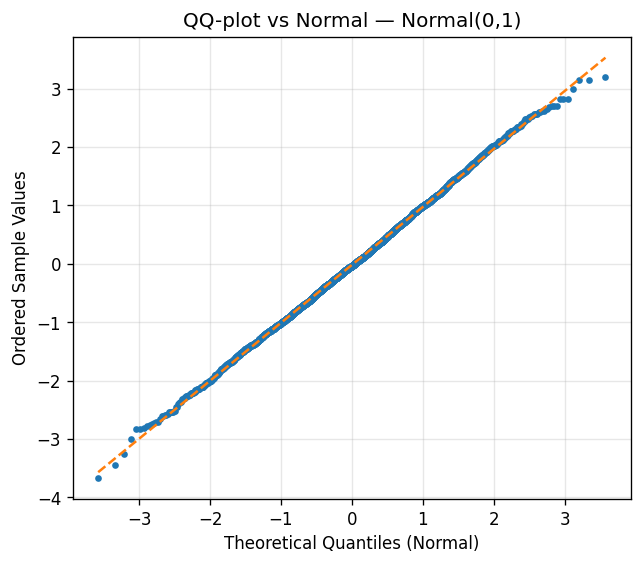

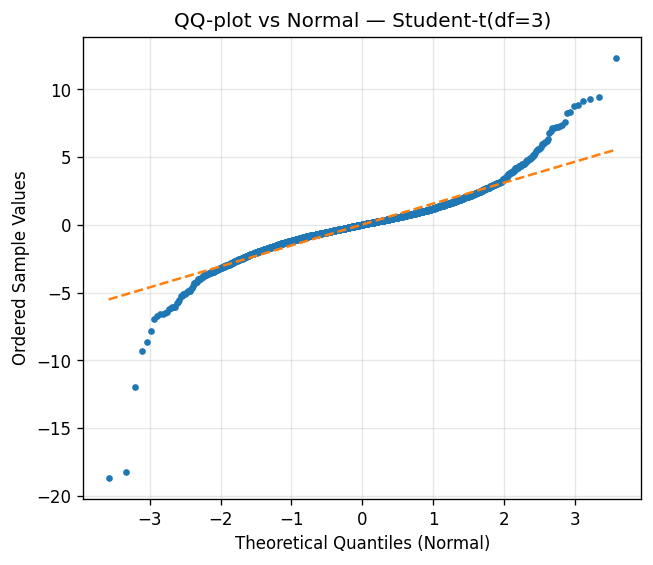

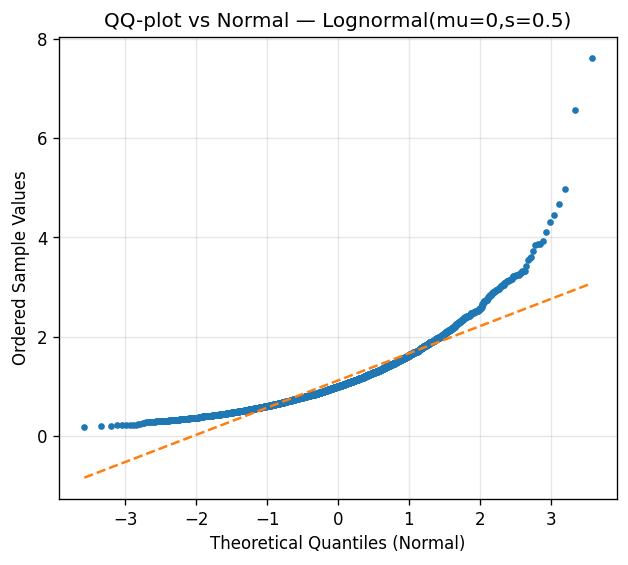

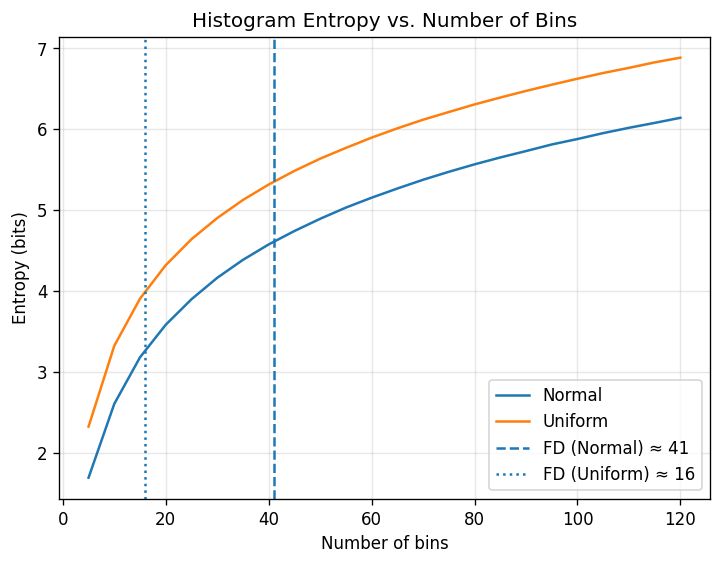

--- Distribution metrics per synthetic distribution ---
            Distribution     n    mean     std       CV    skew  kurtosis  \
0            Normal(0,1)  4000 -0.0176  0.9916  56.3367  0.0510    2.9453   
1  Lognormal(mu=0,s=0.5)  4000  1.1169  0.5825   0.5215  1.8648   11.4591   
2        Student-t(df=3)  4000  0.0215  1.6296  75.6902 -0.4084   16.3387   
3          Uniform(-2,2)  4000  0.0215  1.1661  54.3424 -0.0232    1.7629   
4     Bimodal(0,1)∪(5,1)  4000  2.5135  2.6874   1.0692  0.0051    1.5207   
5   Exponential(scale=1)  4000  1.0285  1.0213   0.9930  1.8651    7.6220   

   excess_kurtosis  bimodality_coeff  entropy_FD_bits  FD_bins  normaltest_p  \
0          -0.0547            0.3404           4.6069       41        0.3311   
1           8.4591            0.3907           4.4239       80        0.0000   
2          13.3387            0.0714           3.9156       80        0.0000   
3          -1.2371            0.5676           3.9974       16        0.0000   
4   

'/mnt/data/distribution_metrics.csv'

In [ ]:
# Distribution Analysis Illustrations (Matplotlib-only, no seaborn)
# This script creates several synthetic distributions and demonstrates:
# - Mean, Std, CV
# - Skewness, Kurtosis, Bimodality Coefficient
# - Entropy via Freedman–Diaconis binning
# - Normality tests (Shapiro, D’Agostino–Pearson, Jarque–Bera, Anderson–Darling)
# - Z-score outlier rate (|z|>3)
# - QQ-plots for normality intuition
# - A summary table of metrics per distribution
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis, entropy, shapiro, normaltest, jarque_bera, anderson, probplot, t
def display_dataframe_to_user(title, df):
    print(f"--- {title} ---")
    print(df)

rng = np.random.default_rng(7)

# ------------------------ 1) Generate synthetic distributions ------------------------
n = 4000

distributions = {
    "Normal(0,1)": rng.normal(0, 1, n),
    "Lognormal(mu=0,s=0.5)": rng.lognormal(mean=0.0, sigma=0.5, size=n),            # right-skewed
    "Student-t(df=3)": t(df=3).rvs(size=n, random_state=rng.integers(1, 1_000_000)), # heavy-tailed
    "Uniform(-2,2)": rng.uniform(-2, 2, n),                                          # light-tailed
    "Bimodal(0,1)∪(5,1)": np.concatenate([rng.normal(0, 1, n//2), rng.normal(5, 1, n//2)]),
    "Exponential(scale=1)": rng.exponential(scale=1.0, size=n),                      # right-skewed
}

# ------------------------ 2) Helper functions ------------------------
def freedman_diaconis_bins(x, max_bins=80):
    x = np.asarray(x)
    x = x[np.isfinite(x)]
    n = len(x)
    if n <= 1:
        return 10
    q75, q25 = np.percentile(x, [75, 25])
    iqr = q75 - q25
    if iqr <= 0:
        return 30
    h = 2 * iqr / (n ** (1/3))
    if h <= 0:
        return 30
    bins = int(np.ceil((np.max(x) - np.min(x)) / h))
    bins = int(np.clip(bins, 10, max_bins))
    return bins

def discrete_entropy_fd(x):
    bins = freedman_diaconis_bins(x)
    hist, edges = np.histogram(x, bins=bins, density=False)
    p = hist.astype(float) / max(1, hist.sum())
    # add epsilon for stability (log(0))
    p = p + 1e-12
    return float(entropy(p, base=2)), bins

def z_outlier_pct(x, thr=3.0):
    x = np.asarray(x, float)
    mu = np.mean(x)
    sd = np.std(x, ddof=1)
    if not np.isfinite(sd) or sd == 0:
        return 0.0
    z = (x - mu) / sd
    return float((np.abs(z) > thr).mean() * 100.0)

def bimodality_coefficient(skew_val, kurt_val):
    # BC = (skew^2 + 1) / kurtosis (Pearson), guard division by zero
    return (skew_val**2 + 1.0) / kurt_val if kurt_val != 0 else np.nan

def safe_shapiro(x, max_n=5000, seed=0):
    x = np.asarray(x)
    n = len(x)
    if n < 3:
        return np.nan
    if n > max_n:
        rng_local = np.random.default_rng(seed)
        idx = rng_local.choice(n, size=max_n, replace=False)
        x = x[idx]
    try:
        return float(shapiro(x).pvalue)
    except Exception:
        return np.nan

def classify_distribution(skew_val, kurt_val, normaltest_p, alpha=0.05):
    is_gaussian = (normaltest_p > alpha and abs(skew_val) < 1.0)
    is_heavy = kurt_val > 3.0
    is_skew = abs(skew_val) > 1.0
    label = []
    if is_gaussian:
        label.append("Gaussian-like")
    if is_skew:
        label.append("Skewed")
    if is_heavy:
        label.append("Heavy-tailed")
    if not label:
        label.append("Other / investigate")
    return ", ".join(label)

# ------------------------ 3) Compute metrics & visualize ------------------------
rows = []
for name, x in distributions.items():
    x = x[np.isfinite(x)]
    mu = float(np.mean(x))
    sd = float(np.std(x, ddof=1))
    cv = (sd / abs(mu)) if mu != 0 else np.nan
    sk = float(skew(x, bias=False))
    ku = float(kurtosis(x, fisher=False, bias=False))  # Pearson (normal=3)
    ex_kurt = ku - 3.0
    bc = float(bimodality_coefficient(sk, ku))
    H, fd_bins = discrete_entropy_fd(x)
    # Normality tests
    try:
        nt_stat, nt_p = normaltest(x)
        nt_p = float(nt_p)
    except Exception:
        nt_p = np.nan
    try:
        jb_stat, jb_p = jarque_bera(x)
        jb_p = float(jb_p)
    except Exception:
        jb_p = np.nan
    sw_p = safe_shapiro(x, max_n=5000, seed=77)
    # Anderson-Darling (no p-value; report stat and 5% critical)
    ad = anderson(x, dist="norm")
    ad_stat = float(ad.statistic)
    # choose closest critical value to 5%
    try:
        crit_5 = float(ad.critical_values[np.argmin(np.abs(np.array(ad.significance_level) - 5.0))])
    except Exception:
        crit_5 = np.nan
    z_out = z_outlier_pct(x, thr=3.0)
    # Classification
    label = classify_distribution(sk, ku, nt_p, alpha=0.05)

    rows.append({
        "Distribution": name,
        "n": len(x),
        "mean": mu,
        "std": sd,
        "CV": cv,
        "skew": sk,
        "kurtosis": ku,
        "excess_kurtosis": ex_kurt,
        "bimodality_coeff": bc,
        "entropy_FD_bits": H,
        "FD_bins": fd_bins,
        "normaltest_p": nt_p,
        "jarque_bera_p": jb_p,
        "shapiro_p": sw_p,
        "AD_stat": ad_stat,
        "AD_crit_~5%": crit_5,
        "pct_|z|>3": z_out,
        "classification": label,
    })

    # Histogram with FD binning + key stats in the title
    fig = plt.figure(figsize=(7, 5), dpi=120)
    plt.title(f"{name} — FD bins={fd_bins}  |  μ={mu:.2f}, σ={sd:.2f}, skew={sk:.2f}, kurt={ku:.2f}")
    plt.hist(x, bins=fd_bins, alpha=0.8)
    plt.grid(True, alpha=0.3)
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.show()

# ------------------------ 4) QQ-plots (normality intuition) ------------------------
for name in ["Normal(0,1)", "Student-t(df=3)", "Lognormal(mu=0,s=0.5)"]:
    x = distributions[name]
    fig = plt.figure(figsize=(6, 5), dpi=120)
    plt.title(f"QQ-plot vs Normal — {name}")
    (osm, osr), (slope, intercept, r) = probplot(x, dist="norm")
    plt.plot(osm, osr, marker="o", linestyle="", markersize=3)
    # reference line
    xline = np.linspace(np.min(osm), np.max(osm), 100)
    plt.plot(xline, slope*xline + intercept, linestyle="--")
    plt.grid(True, alpha=0.3)
    plt.xlabel("Theoretical Quantiles (Normal)")
    plt.ylabel("Ordered Sample Values")
    plt.show()

# ------------------------ 5) Entropy vs number of bins demo ------------------------
# Illustrate why Freedman–Diaconis is a good default using a Normal and a Uniform
def entropy_vs_bins(x, bins_list):
    Hs = []
    for b in bins_list:
        hist, edges = np.histogram(x, bins=b, density=False)
        p = hist.astype(float) / max(1, hist.sum())
        p = p + 1e-12
        Hs.append(float(entropy(p, base=2)))
    return np.array(Hs, float)

bins_list = np.arange(5, 121, 5)
x_norm = distributions["Normal(0,1)"]
x_unif = distributions["Uniform(-2,2)"]

H_norm = entropy_vs_bins(x_norm, bins_list)
H_unif = entropy_vs_bins(x_unif, bins_list)
fd_norm = freedman_diaconis_bins(x_norm)
fd_unif = freedman_diaconis_bins(x_unif)

fig = plt.figure(figsize=(7, 5), dpi=120)
plt.title("Histogram Entropy vs. Number of Bins")
plt.plot(bins_list, H_norm, label="Normal")
plt.plot(bins_list, H_unif, label="Uniform")
plt.axvline(fd_norm, linestyle="--", label=f"FD (Normal) ≈ {fd_norm}")
plt.axvline(fd_unif, linestyle=":", label=f"FD (Uniform) ≈ {fd_unif}")
plt.xlabel("Number of bins")
plt.ylabel("Entropy (bits)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


display_dataframe_to_user("Distribution metrics per synthetic distribution", summary.round(4))

summary_path
